# Predicting Newsletter Subscription Tendency: kNN Classification Model for MineCraft Player Engagement

Please install and run the libraries listed below in advance.

In [27]:
### Run this cell before continuing. 
library(tidyverse)
library(tidymodels)
library(janitor)
options(repr.plot.width=9, repr.plot.height=8)

## 1. Introduction

The success of online research platforms, particularly those collecting data on player activity in a video game environment, depends on effective communication with and retention of the user base. For the UBC Computer Science research group led by Frank Wood, which operates the Minecraft server, understanding the player characteristics that predict engagement and newsletter subscription is crucial for optimizing recruitment and outreach strategies.

The core question is: **What player characteristics are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?** More specifically: **How might a player's experience and total hours played predict their tendency to subscribe to a newsletter? And how does this differ between players of various ages?** 

This project uses the dataset `players.csv`, which contains unique player records with their descriptive features such as age and gender (see **Table 1** for a detailed description of each variable). We will begin by outlining the necessary data wrangling and cleaning procedures to address missing values (NA) and properly structure the dataset for modeling. Next, exploratory data analysis will be performed to visualize trends between player attributes (`Age`, `experience`, `played_hours`) and the binary subscription outcomes (`subscribe`). We will then implement and evaluate a k-Nearest Neighbors (kNN) classification model to predict players' subscription status, providing insights into which player profiles may be most responsive to targeted communication strategies. 

A potential limitation is the presence of missing data in the dataset. Additionally, `players.csv` is a relatively small dataset with only 196 observations, which may constrain the model's predictive accuracy. 

#### Table 1 - Variable Description of Dataset `players.csv`:
| variable | type | description |
|----------|------|-------------|
| experience | character | experience level (Beginner, Amateur, Regular, Pro, Veteran) |
| subscribe | logical | newsletter subscription (True/False) |
| hashedEmail | character | player identifier |
| played_hours | double | total hours played |
| name | character | player name |
| gender | character | player's gender |
| Age | double | age in years |


## 2. Methods and Results

The data analysis will be split up into five stages.
1. Loading the data and making it tidy
2. Creating new variables and replacing missing values
3. Conducting exploratory data analysis
4. Constructing a k-Nearest Neigbours classification model
5. Visualizing the results

### 2.1. Loading and Tidying the Dataset

In this step, we load the dataset using the `read_csv` function and make several adjustments. First, we standardize the variable names with `clean_names()`. Next, we convert `subscribe` into a categorical factor with `as.factor()`, which is required for classification. Finally, we create an `age_group` variable to allow meaningful comparisons during the exploratory data analysis.

In [28]:
players <- read_csv("https://raw.githubusercontent.com/eshaanmaniani/DSCI-Project-Planning/refs/heads/main/players.csv")
#Converts subscribe to a factor, standardizes variable names, and creates a new column that separates age groups
players <- players |>
  clean_names() |>
  mutate(
    subscribe = as.factor(subscribe),
    age_group = case_when(
      age < 20 ~ "Under 20",
      age >= 20 & age <= 30 ~ "20 to 30",
      age > 30 & age <= 40 ~ "31 to 40",
      age > 40 ~ "Over 40",
      TRUE ~ "Unknown"))

players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashed_email,played_hours,name,gender,age,age_group
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,Under 20
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,Under 20
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,Under 20
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,20 to 30
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,20 to 30
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,Under 20
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,Under 20
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,20 to 30
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47,Over 40


### 2.2. Summary Statistics

We compute the mean value for the quantitative variables (`played_hours` and `age`), and we present the values in **Table 2**. According to the table, most players are young and play for relatively few hours.

In [29]:
#Finds the mean for each numerical column
numeric_mean <- players |>
  select(where(is.numeric)) |>
  summarise(across(everything(), ~ round(mean(.x, na.rm = TRUE), 2)))

numeric_mean

played_hours,age
<dbl>,<dbl>
5.85,21.14


#### Table 2: Mean of Quantitative Variables
| quantitative variable | mean | 
|----------|------|
| played_hours | 5.85 | 
| Age | 21.14 | 


### 2.3. Exploratory Data Analysis

To visualize the relationship between player attributes (Age, Experience, Hours Played) and the binary subscription outcomes, we begin by exploring the subscription percentage across age groups in **Figure 1**. The bar chart shows that newsletter subscription is highly age-dependent. The highest subscription rates appear among the youngest players (under 30), with another noticeable increase among players over 40. In contrast, players between ages 31-40 show the lowest subscription percentages. This suggests that player characteristics, specifically age, meaningfully influence their likelihood of subscribing to newsletters.

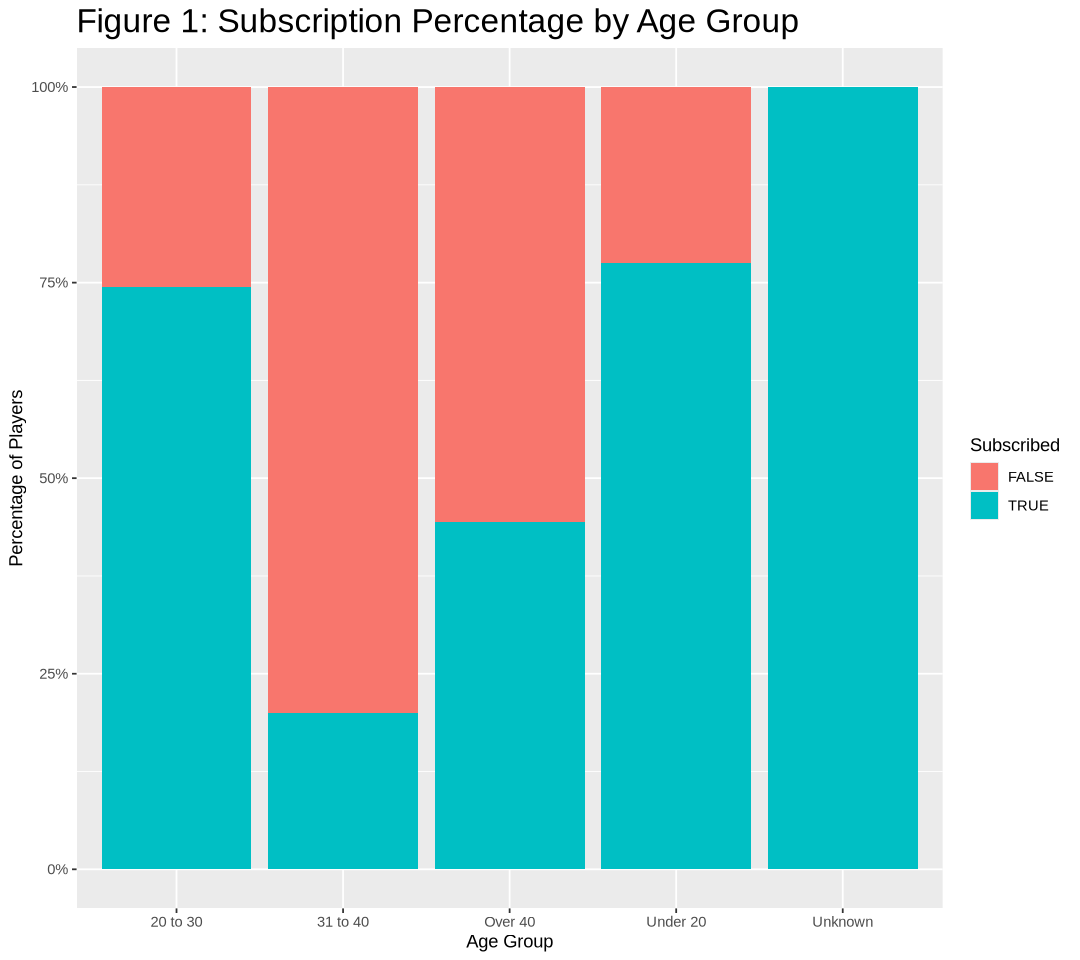

In [30]:
subscription_percentage <- ggplot(players, aes(x = age_group, fill = subscribe)) +
  geom_bar(position = "fill") +
  scale_y_continuous(labels = scales::percent) +
  labs(
    title = "Figure 1: Subscription Percentage by Age Group",
    x = "Age Group",
    y = "Percentage of Players",
    fill = "Subscribed"
  ) +
 theme(plot.title = element_text(size = 20))
subscription_percentage

We next explore the relationship between player age and total hours played using a scatterplot in **Figure 2**. The visualization illustrates that younger players (approximately 10-25 years old) display a wide range of total playtime, including several outlier values exceeding 150 hours played. In contrast, almost all players over 30 report fewer than 10 total hours played, suggesting lower engagement. Generally, the distribution is heavily skewed towards lower playtime, and the significant variability among young players shows that engagement is strongly age-dependent.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


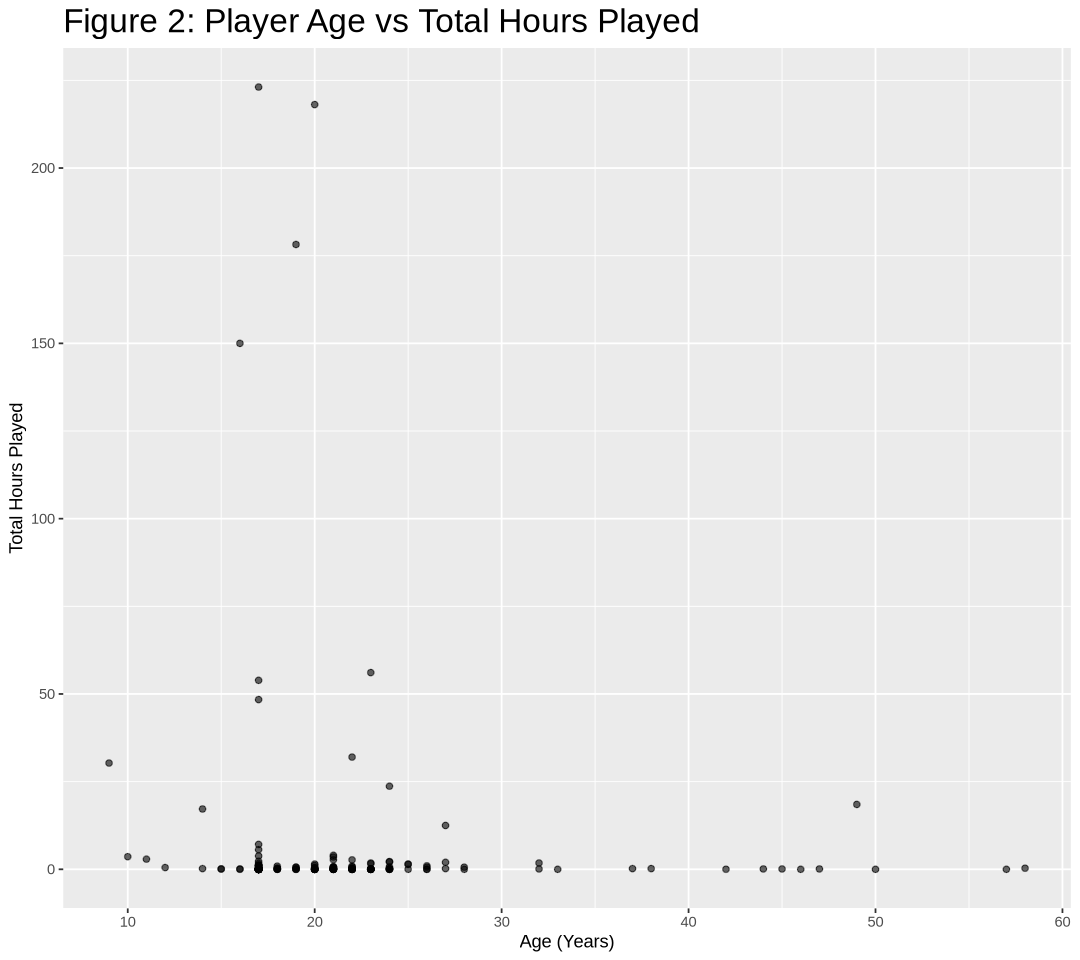

In [31]:
players_vs_hours <- ggplot(players, aes(x = age, y = played_hours)) +
  geom_point(alpha = 0.6) +
  labs(
    title = "Figure 2: Player Age vs Total Hours Played",
    x = "Age (Years)",
    y = "Total Hours Played"
  ) +
  theme(plot.title = element_text(size = 20))

players_vs_hours

To further examine the distribution of `played_hours`, we generated a histogram in **Figure 3**, which reveals a highly right-skewed distribution. The vast majority of players have logged fewer than 10 hours on the server, with only a small subset exceeding 50 hours, and a few extreme cases reaching over 150-200 hours. This indicates that the population mainly consists of casual players, while highly engaged players are comparatively rare. This skewness is important for modeling because it suggests that a small number of highly active players may disproportionately influence analyses involving total hours played.

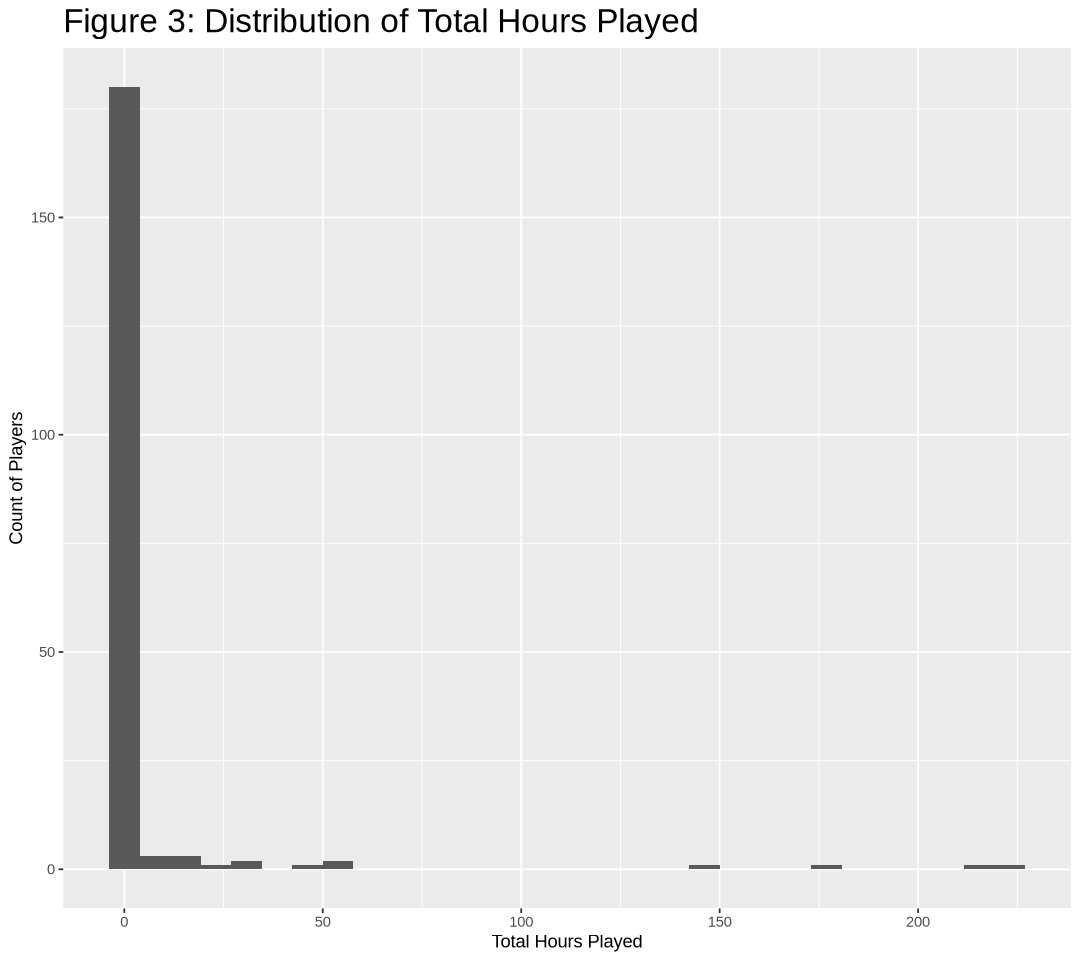

In [32]:
distribution_total_hours <- ggplot(players, aes(x = played_hours)) +
  geom_histogram(bins = 30) +
  labs(title = "Figure 3: Distribution of Total Hours Played",
    x = "Total Hours Played",
    y = "Count of Players") +
  theme(plot.title = element_text(size = 20))
distribution_total_hours

### 2.4. Building the k-Nearest Neighbors Model

We chose to use a K-Nearest Neighbours classification model to answer our question. We think that kNN is appropriate because the target variable is categorical (true/false). In this case, it will predict whether an individual subscribed to a newsletter based on the most common class of the nearest observations. The predictors are `experience` and `played_hours`, which must be scaled so that distances are comparable. Furthermore, we trained the model using a certain proportion of the dataset and evaluated the prediction accuracy on the remaining portion of the data, using a train/test split. 

This split ensures that the proportions subscribed are balanced across sets:

In [33]:
set.seed(1)

player_split <- initial_split(players, prop = 0.75, strata = subscribe)
player_train <- training(player_split)
player_test  <- testing(player_split)

Since kNN relies on distance calculations, all predictors were scaled to ensure that variables on different units contributed equally to the model. Additionally, although `age` showed significant patterns in the exploratory analysis, it was excluded from the final KNN model due to missing values and issues with scaling. Hence, the predictors used for classification were `experience` and `total_hours`.

In [34]:
player_recipe <- recipe(subscribe ~ experience + played_hours, data = player_train) |>
  step_dummy(all_nominal_predictors()) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

In [35]:
knn_spec <- nearest_neighbor(
  weight_func = "rectangular",
  neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

We use cross-validation to tune the optimal numbers of neighbours:

In [36]:
player_vfold <- vfold_cv(player_train, v = 5, strata = subscribe)

k_vals <- tibble(neighbors = seq(1, 50, by = 2))

knn_results <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(knn_spec) |>
  tune_grid(
    resamples = player_vfold,
    grid = k_vals
  ) |>
  collect_metrics()

We select the best value of k:

In [37]:
best_k <- knn_results |>
  filter(.metric == "accuracy") |>
  arrange(desc(mean)) |>
  slice(1) |>
  pull(neighbors)

In [38]:
knn_final_spec <- nearest_neighbor(
  weight_func = "rectangular",
  neighbors = best_k
) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_final_fit <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(knn_final_spec) |>
  fit(data = player_train)

This produces accuracy and confusion matrix values that indicate how well the KNN model predicts subscription status:

In [39]:
player_test_predictions <- predict(knn_final_fit, player_test) |>
  bind_cols(player_test)

player_test_predictions |> accuracy(truth = subscribe, estimate = .pred_class)
player_test_predictions |> conf_mat(truth = subscribe, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6734694


          Truth
Prediction FALSE TRUE
     FALSE     0    3
     TRUE     13   33

The kNN model results indicate that the model accurately predicts subscriptions 67.3% of the time. Accuracy reflects the proportion of correct predictions on the test set. Since the dataset is highly imbalanced, accuracy alone may be misleading, which is why it is important to consider the confusion matrix. However, the confusion matrix indicates that out of all 49 predictions, 46 predictions were true while only 3 were predicted false, and all 3 were wrong. 

### 2.5. Visualizing the Results

Lastly, the result is visualized in **Figure 4**. It visually compares the actual subscription status of players with the predicted class labels from the kNN model. While it correctly identifies many TRUE cases, it fails to correctly classify any FALSE cases, mislabeling nearly all non-subscribers as TRUE. This demonstrates that the model is heavily biased toward the majority class and struggles to distinguish between subscribers and non-subscribers.

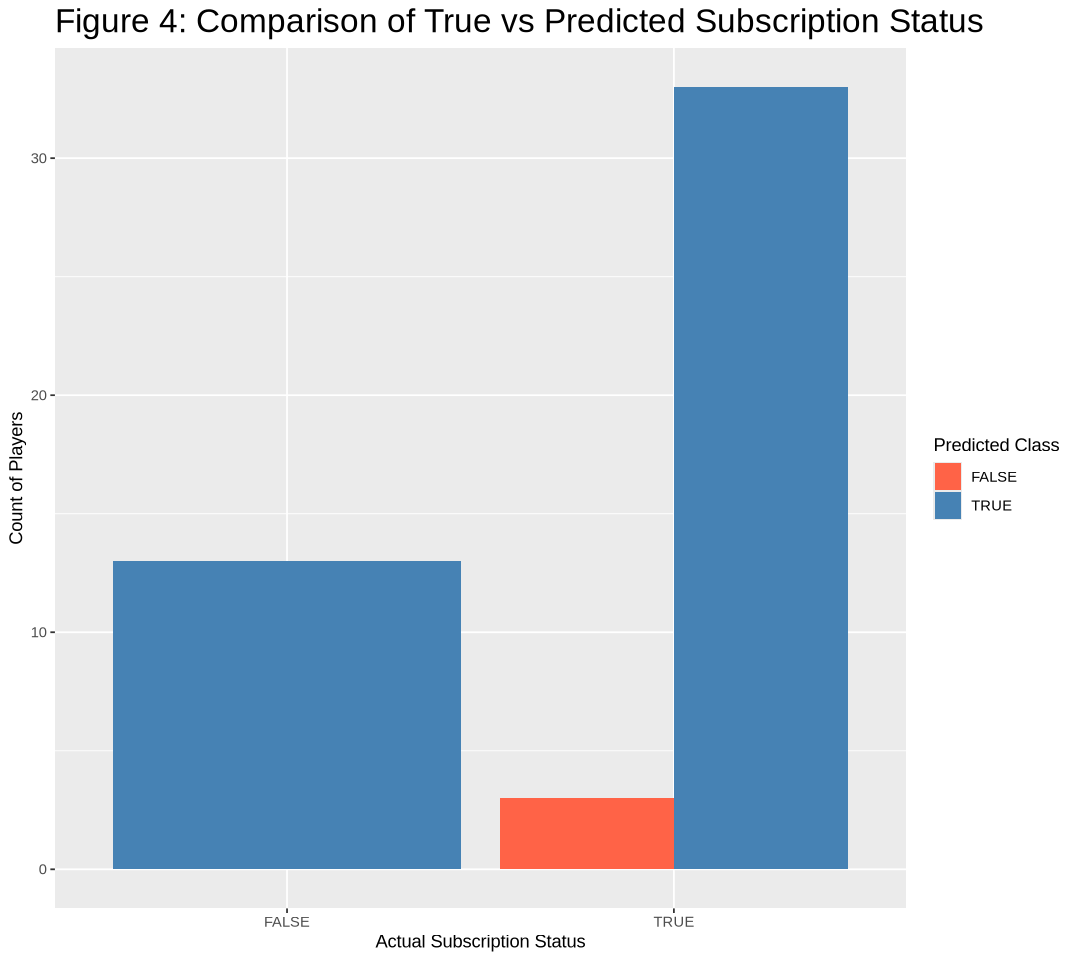

In [40]:
ggplot(player_test_predictions, aes(x = subscribe, fill = .pred_class)) +
  geom_bar(position = "dodge") +
  labs(
    title = "Figure 4: Comparison of True vs Predicted Subscription Status",
    x = "Actual Subscription Status",
    y = "Count of Players",
    fill = "Predicted Class"
  ) +
  scale_fill_manual(values = c("FALSE" = "tomato", "TRUE" = "steelblue")) +
  theme(plot.title = element_text(size = 20))


## 3. Discussion

**What we found:**

The kNN model achieved an overall accuracy of 67.3%, meaning it correctly predicted the subscription status for about two-thirds of the test set. However, the model is heavily biased toward the majority class (subscribers). In the training data (`player_train`), approximately 73% of cases are TRUE (subscribers) and 27% are FALSE (non-subscribers), as indicated by the results stored in `subscribe_proportions` below. This means a simple majority-class classifier would already achieve around 73% accuracy. The kNN classifier, with an accuracy of 67.3%, does not improve upon this baseline, indicating that it adds little predictive value in terms of overall accuracy.

Furthermore, if we consider FALSE (non-subscribers) as the class of interest (positive label), the classifier’s precision and recall are both 0%, despite the seemingly moderate accuracy. While the classifier correctly identifies almost all TRUE cases, it fails to classify any FALSE cases, mislabeling them as subscribers. The confusion matrix highlights this severe imbalance, and **Figure 4** visually demonstrates that the model cannot effectively distinguish non-subscribers from subscribers.

In [41]:
subscribe_proportions <- player_train |>
                      group_by(subscribe) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(player_train))
subscribe_proportions

subscribe,n,percent
<fct>,<int>,<dbl>
FALSE,39,26.53061
TRUE,108,73.46939


**Whether this is what we expected to find:**

This result aligns with the expectation given the highly imbalanced dataset. To be more specific, kNN tends to favor the majority class when class distributions are uneven, especially when only two predictors (`experience` and `played_hours`) are used. While it was expected that the model would predict subscribers reasonably well, the complete failure to predict non-subscribers highlights the limitation of KNN in handling cases when classes are imbalanced.

**What impact could such findings have:**

The model’s bias toward the majority class limits its practical usefulness. In our case, the research team needs to target recruitment effectively and ensure they have enough resources to handle the player load. However, because our model predicts everyone as a subscriber, the team would likely overestimate demand, allocating more resources than necessary. This could be inefficient and costly, particularly for a university-run-project with limited funding and server capacity. 
Besides, since our model fails to identify non-subscribers, any recruitment strategies aimed at engaging them would be misguided, as the team would have no way knowing which players are less likely to participate. 

**What future questions could this lead to:**

- How can the model be improved to handle imbalanced data more effectively?
- Would incorporating additional features such as age and gender improve classification of non-subscribers?